<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [7]:
# Define the relative path to the CSV file
filename = '../data/Wholesale customers data.csv'

# Load the CSV file into a DataFrame
try:
    wholesale_data = pd.read_csv(filename)
    print("Data successfully loaded!")
    print(wholesale_data.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"File '{filename}' not found. Please check the file path and try again.")
except pd.errors.EmptyDataError:
    print("The file is empty. Please check the contents of the file.")
except pd.errors.ParserError:
    print("Error parsing the file. Please check the file format.")

Data successfully loaded!
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [10]:
print(wholesale_data.head())  # Display the first few rows of the DataFrame

print(wholesale_data.columns) # Display the columns of the DataFrame

print(wholesale_data.info()) # Display info of the DataFrame

print(wholesale_data.dtypes) # Display data types of the DataFrame

print(wholesale_data.isnull().sum()) # Display number of missing values of the DataFrame

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery          

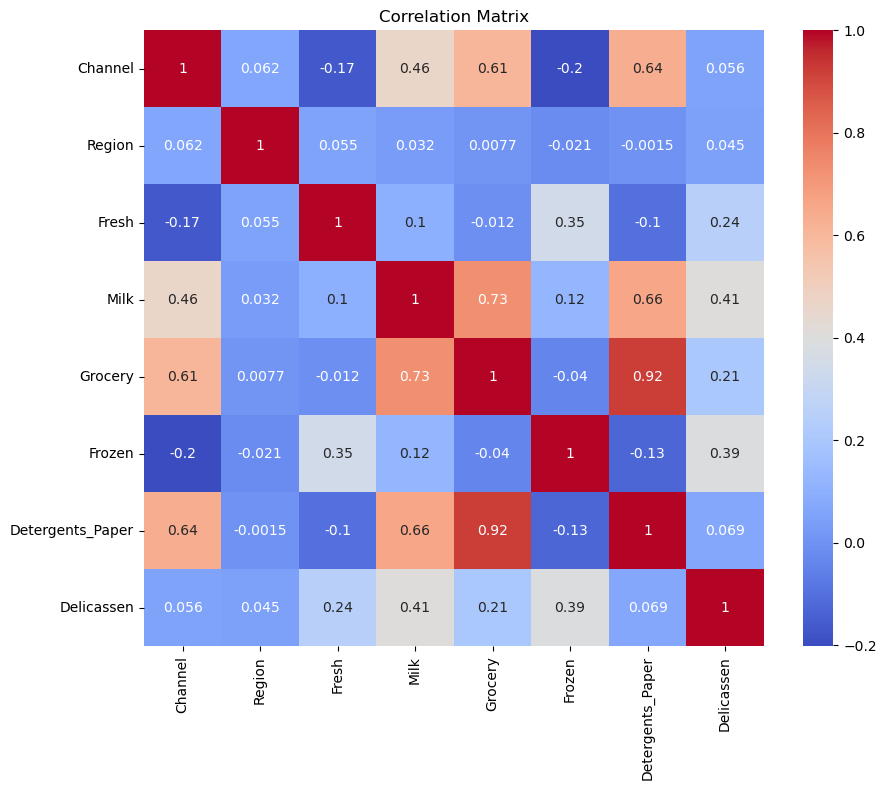

In [11]:

# Display colinearity of the DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(wholesale_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
print(wholesale_data.describe())  # Display  basic statistics of the DataFrame

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

[[<Axes: title={'center': 'Channel'}> <Axes: title={'center': 'Region'}>
  <Axes: title={'center': 'Fresh'}>]
 [<Axes: title={'center': 'Milk'}> <Axes: title={'center': 'Grocery'}>
  <Axes: title={'center': 'Frozen'}>]
 [<Axes: title={'center': 'Detergents_Paper'}>
  <Axes: title={'center': 'Delicassen'}> <Axes: >]]


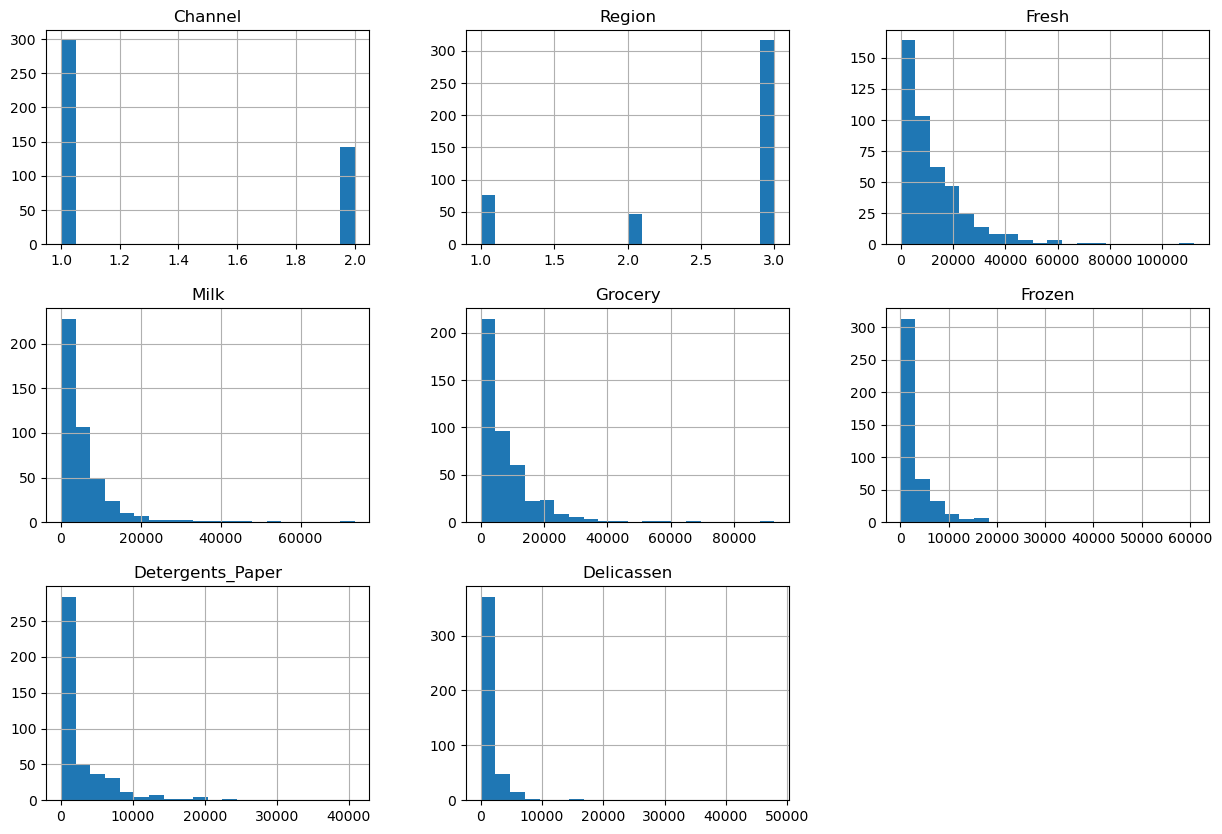

In [13]:
print(wholesale_data.hist(bins=20, figsize=(15, 10)))

In [15]:
print( wholesale_data.skew())
print(wholesale_data.kurtosis())

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64
Channel              -1.427463
Region               -0.100111
Fresh                11.536408
Milk                 24.669398
Grocery              20.914670
Frozen               54.689281
Detergents_Paper     19.009464
Delicassen          170.694939
dtype: float64


<Axes: >

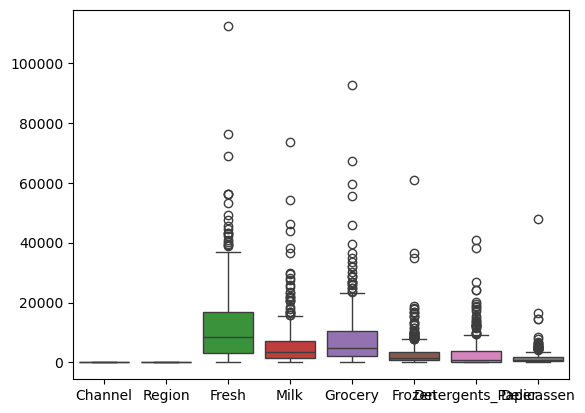

In [16]:
sns.boxplot(data=wholesale_data) # Here we check for outliers and data distribution in each feature


**Your observations here**

- The table shows us customer behaviour. For examnple, which chanel do they use to do the shopping. How many times they go for grocery shopping, in which region, and how much they buy certain products ( fresh, milk, frozen, detergents and delicatessen)
- All are integers so we don't have to deal with categorical data and no missing values. However, there are very different scales within the features therefore we will need to transorm the data. 
- We do have high colinearity between detergents and Grocery, so we can probably drop one of them
- several of the columns are highly skewed to lower values and have a long tail.




# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [60]:
# Challenge 2 - Data Cleaning and Transformation

# Drop the 'Detergents_Paper' column due to high collinearity with 'Grocery'
cleaned_data = wholesale_data.drop(columns=['Detergents_Paper'])

# Apply log transformation to reduce skewness
# Use np.log1p to handle zero values correctly (log(1 + x))
columns_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']
cleaned_data[columns_to_transform] = cleaned_data[columns_to_transform].apply(np.log1p)

# Display the cleaned and transformed data
print(cleaned_data.head())




   Channel  Region      Fresh      Milk   Grocery    Frozen  Delicassen
0        2       3   9.446992  9.175438  8.930891  5.370638    7.199678
1        2       3   8.861917  9.191259  9.166284  7.474772    7.482682
2        2       3   8.756840  9.083529  8.947026  7.785721    8.967632
3        1       3   9.492960  7.087574  8.348064  8.764834    7.489412
4        2       3  10.026413  8.596189  8.881697  8.272826    8.553718


**Your comment here**
 - The 'Detergents_Paper' column was dropped due to high collinearity with 'Grocery'.
 - Log transformation was applied to reduce skewness in heavily skewed features.
 - These steps help to ensure that the data is better prepared for clustering algorithms like k-means.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [61]:

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data after transformation from Challenge 2
customers_scale = scaler.fit_transform(cleaned_data)

# The scaled data is now ready for k-means clustering
print(customers_scale[:5])  # Display the first 5 rows of the scaled data

# Comments about the scaling process
# - StandardScaler was used to standardize the data, centering it around zero with unit variance.
# - This step is crucial because k-means is sensitive to feature scales and requires all features to be on a similar scale.



[[ 1.44865163  0.59066829  0.4861845   0.97629884  0.44015468 -1.50924981
   0.40896595]
 [ 1.44865163  0.59066829  0.08788863  0.99095612  0.65217085  0.13405226
   0.62792606]
 [ 1.44865163  0.59066829  0.01635628  0.89115098  0.45468702  0.37689926
   1.77683339]
 [-0.69029709  0.59066829  0.51747725 -0.95797283 -0.08479166  1.14157433
   0.63313326]
 [ 1.44865163  0.59066829  0.8806309   0.43966195  0.39584651  0.75732216
   1.4565879 ]]


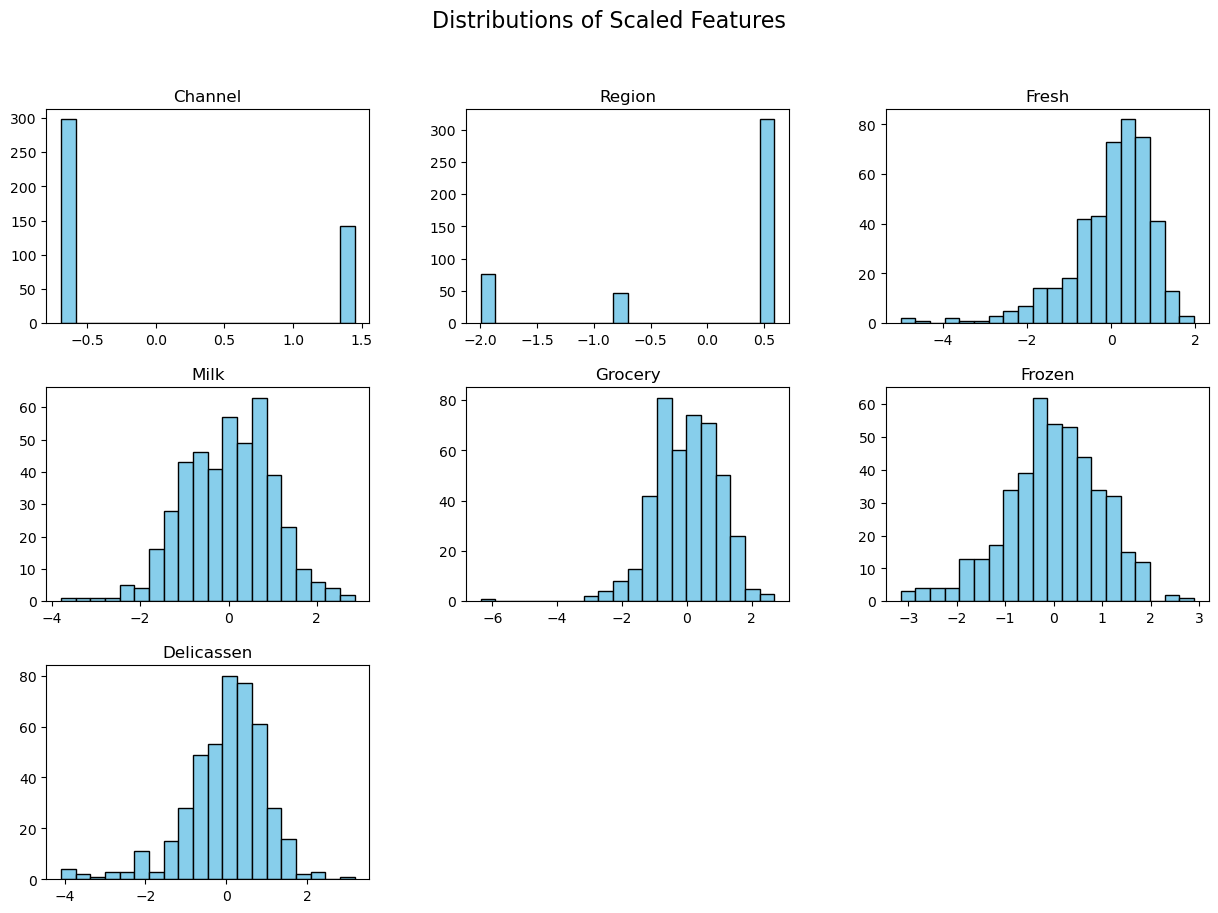

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the scaled data for easier visualization
scaled_df = pd.DataFrame(customers_scale, columns=cleaned_data.columns)

# Plot histograms to check distributions of scaled data
scaled_df.hist(bins=20, figsize=(15, 10), grid=False, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Scaled Features", fontsize=16)
plt.show()


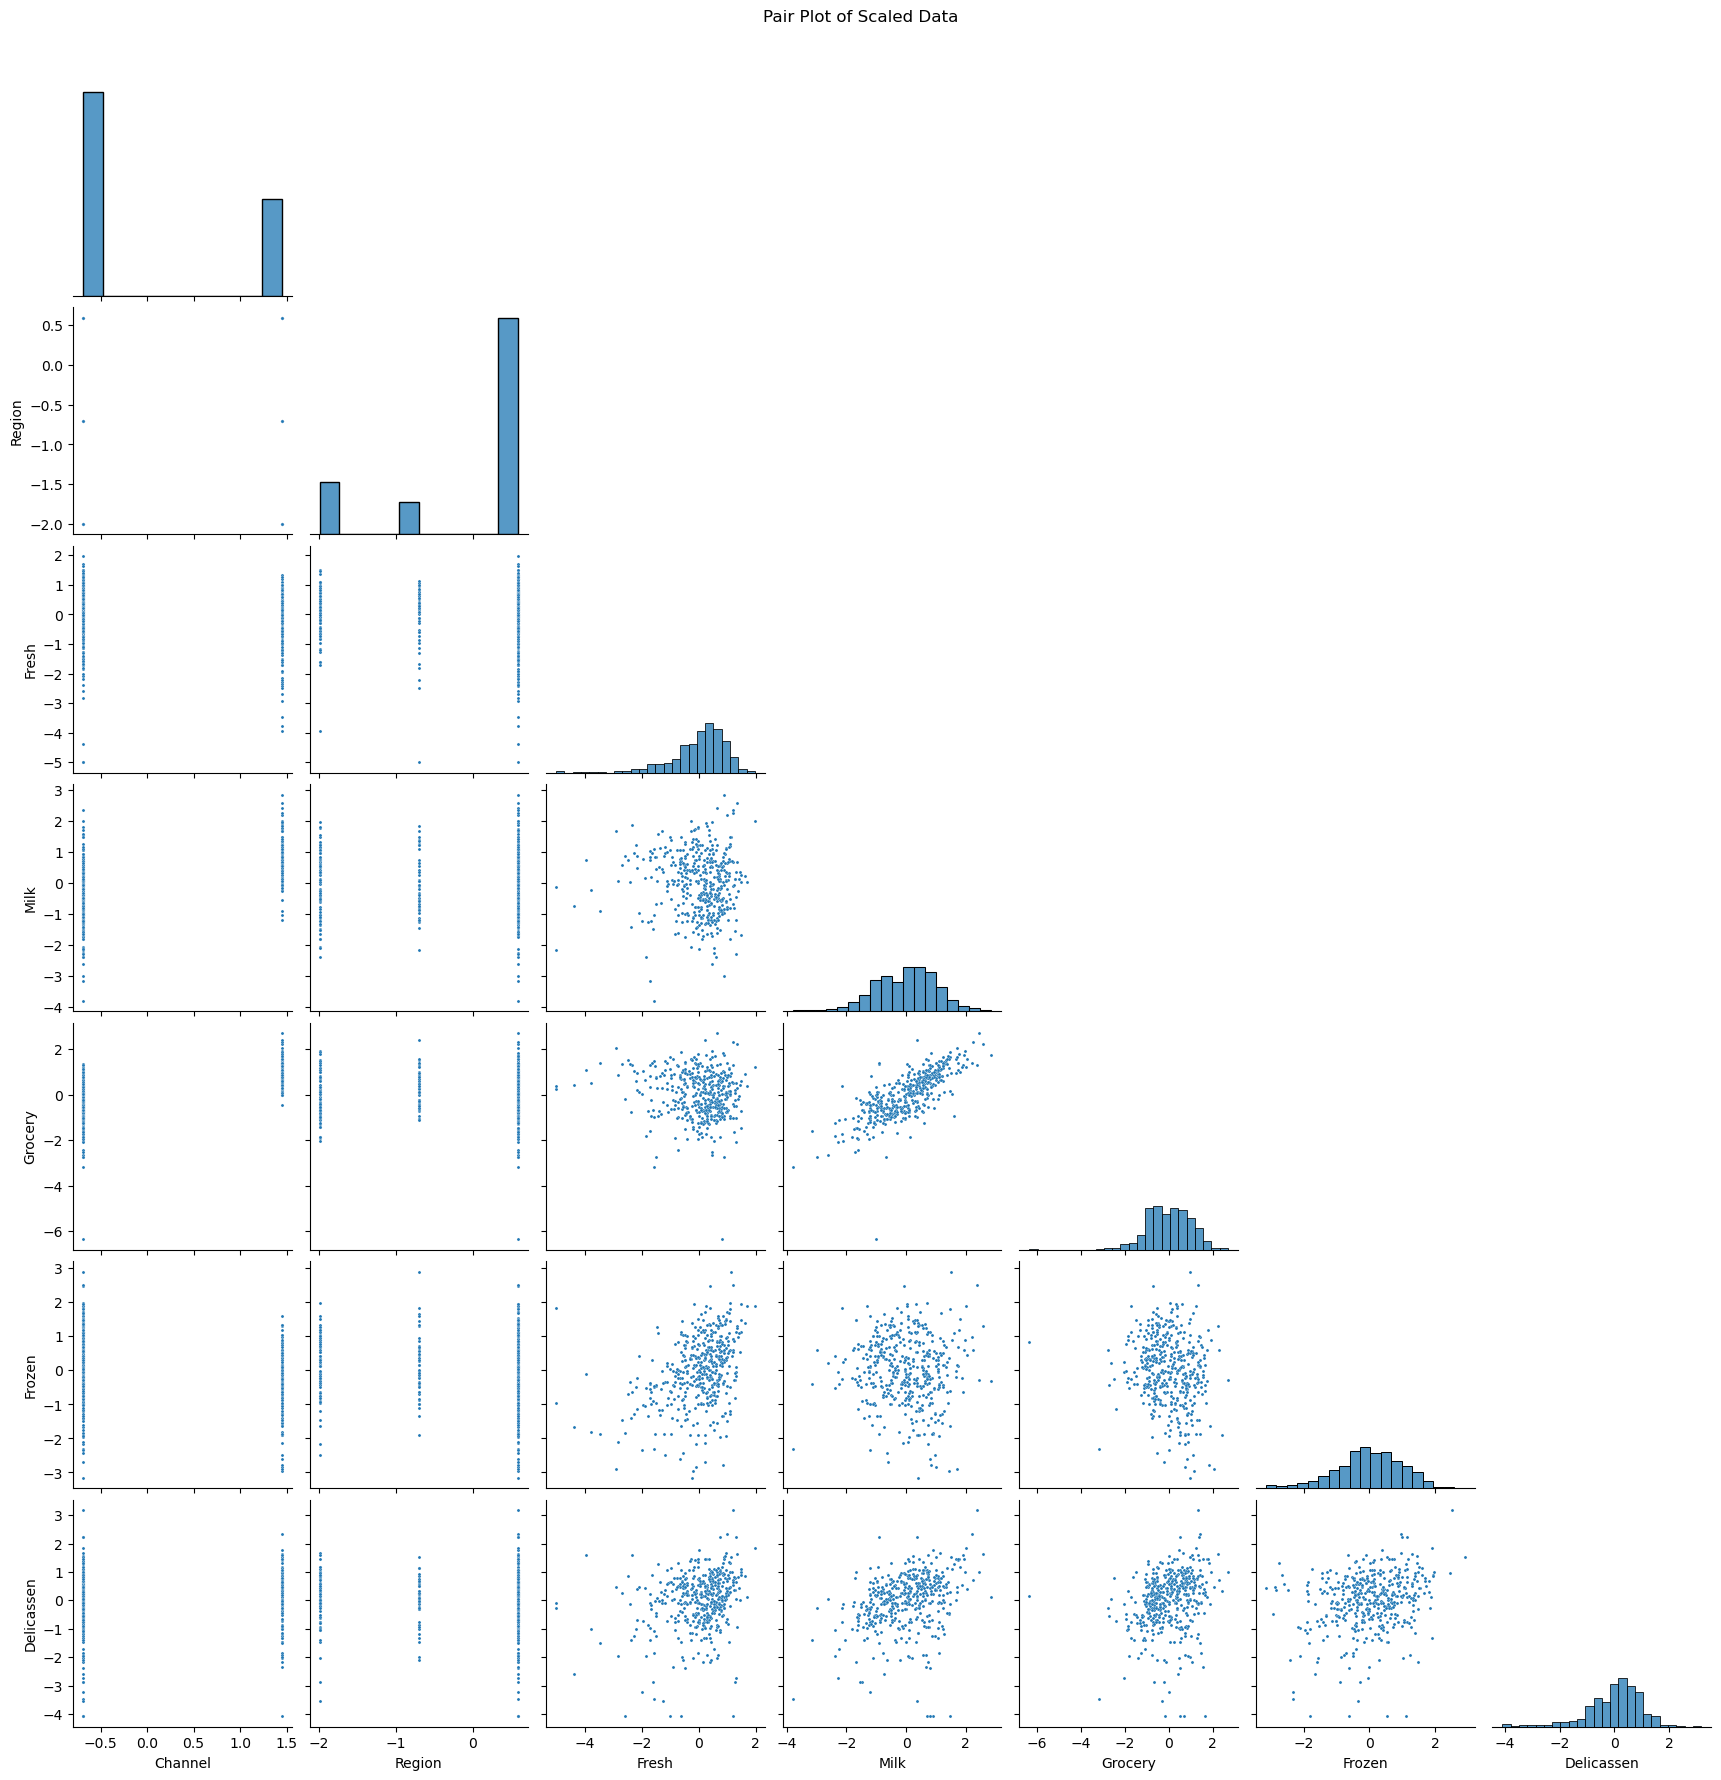

In [63]:

# Plot pairwise relationships to visually inspect the scaled data spread
sns.pairplot(scaled_df, corner=True, plot_kws={"s": 5})
plt.suptitle("Pair Plot of Scaled Data", y=1.02)
plt.show()

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [64]:
# Step 1: Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Step 2: Define the number of clusters based on the elbow method (in this case, 2)
# Fit the K-Means model to the scaled data
kmeans_2 = KMeans(n_clusters=2, random_state=42)  # Adding random_state for reproducibility
kmeans_2.fit(customers_scale)

# Step 3: Predict the clusters for the scaled data
labels = kmeans_2.predict(customers_scale)

# Alternatively, you can directly use the labels_ attribute after fitting
clusters = kmeans_2.labels_.tolist()

# Step 4: Assign the cluster labels to the cleaned DataFrame
cleaned_data['Label'] = clusters

# Display the first few rows of the DataFrame with assigned labels
print(cleaned_data.head())

# Optional: Print the cluster centers and inertia
print("\nCluster Centers:\n", kmeans_2.cluster_centers_)
print("\nInertia:", kmeans_2.inertia_)


c:\Users\Salva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Channel  Region      Fresh      Milk   Grocery    Frozen  Delicassen  Label
0        2       3   9.446992  9.175438  8.930891  5.370638    7.199678      0
1        2       3   8.861917  9.191259  9.166284  7.474772    7.482682      0
2        2       3   8.756840  9.083529  8.947026  7.785721    8.967632      0
3        1       3   9.492960  7.087574  8.348064  8.764834    7.489412      1
4        2       3  10.026413  8.596189  8.881697  8.272826    8.553718      0

Cluster Centers:
 [[ 1.21704572  0.06358336 -0.29055481  0.8668479   0.96369018 -0.38741974
   0.21783526]
 [-0.67518084 -0.03527416  0.16119119 -0.48090149 -0.53462671  0.21492897
  -0.12084854]]

Inertia: 2238.509052749894


### Looking to the elbow we can choose 2 like the correct number of clusters

kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

clean_customers['Label'] = clusters

Count the values in `labels`.

In [65]:
pd.Series(labels).value_counts()

1    283
0    157
Name: count, dtype: int64

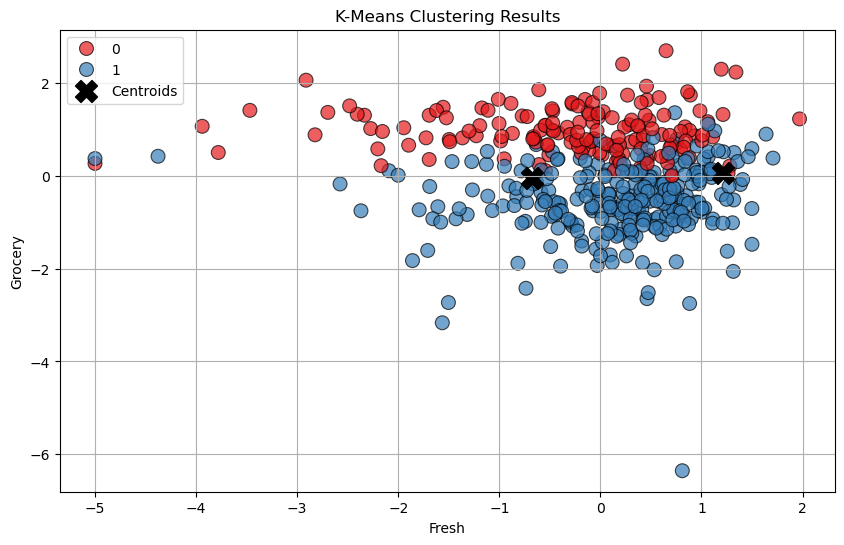

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `customers_scale` is the scaled data and `cleaned_data` is the DataFrame with original values
# Add the cluster labels to the scaled DataFrame for plotting
scaled_df = pd.DataFrame(customers_scale, columns=cleaned_data.columns[:-1])  # Excluding 'Label' column
scaled_df['Label'] = labels  # Add labels column to scaled data

# Plotting the first two principal components or any two features (e.g., 'Fresh' vs. 'Grocery')
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_df['Fresh'], 
    y=scaled_df['Grocery'], 
    hue=scaled_df['Label'], 
    palette='Set1', 
    s=100, 
    alpha=0.7, 
    edgecolor='k'
)
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], c='black', s=250, marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.legend()
plt.grid(True)
plt.show()


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

Cluster Counts: {-1: 434, 0: 6}
Scaled Data Shape: (440, 8), Columns in scaled_df: Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen',
       'Label', 'DBSCAN_Label'],
      dtype='object')


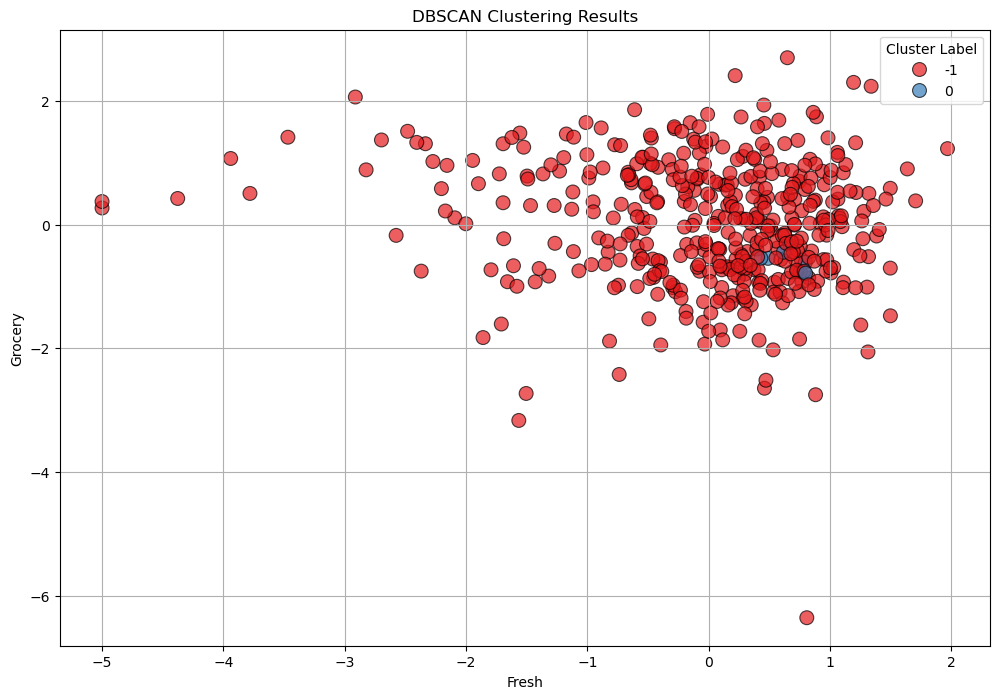

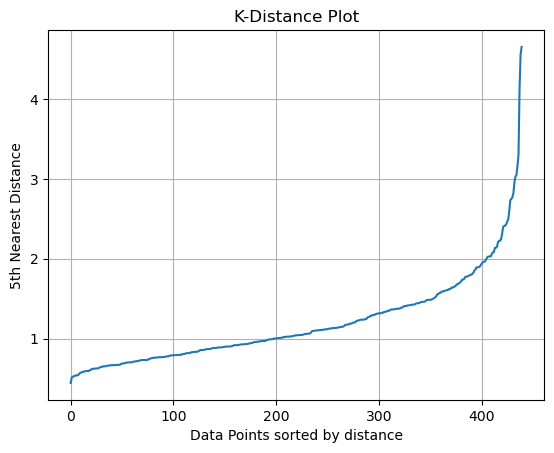

In [69]:
# Step 1: Import Necessary Libraries

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Step 2: Prepare Your Data (Scale the data)
# Assuming `cleaned_data` is the DataFrame after data cleaning and transformation
# Standardize the data (dropping the 'Label' column if it exists)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data.drop(columns=['Label'], errors='ignore'))

# Step 3: Initialize and Fit the DBSCAN Model
# Initialize DBSCAN with default parameters; these may need fine-tuning
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan.fit(scaled_data)

# Step 4: Extract and Analyze the Clusters
# Extract labels assigned by DBSCAN
dbscan_labels = dbscan.labels_

# Count the number of points in each cluster, including noise (-1)
unique, counts = np.unique(dbscan_labels, return_counts=True)
print("Cluster Counts:", dict(zip(unique, counts)))

# Add the cluster labels to the original cleaned data for analysis
cleaned_data['DBSCAN_Label'] = dbscan_labels

# Step 5: Visualize the Clustering Results
# Convert scaled data back to a DataFrame for plotting
# Make sure to assign the correct number of column names to match scaled_data
scaled_df = pd.DataFrame(scaled_data, columns=cleaned_data.columns[:-1])  # Only if cleaned_data has one extra column like 'Label'
scaled_df['DBSCAN_Label'] = dbscan_labels

# Check the shapes to ensure alignment
print(f"Scaled Data Shape: {scaled_data.shape}, Columns in scaled_df: {scaled_df.columns}")

# Plotting the clusters; adjust features as needed (here 'Fresh' vs 'Grocery')
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=scaled_df['Fresh'], 
    y=scaled_df['Grocery'], 
    hue=scaled_df['DBSCAN_Label'], 
    palette='Set1', 
    s=100, 
    alpha=0.7, 
    edgecolor='k'
)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.legend(title='Cluster Label', loc='best')
plt.grid(True)
plt.show()

# Step 6: Fine-Tune Parameters (eps and min_samples) with K-Distance Plot
# Find the optimal eps using the K-Distance plot
neighbors = NearestNeighbors(n_neighbors=5)  # n_neighbors should match min_samples in DBSCAN
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort distances to create the K-Distance plot
distances = np.sort(distances[:, 4], axis=0)  # Select the distance to the 5th nearest point
plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5th Nearest Distance')
plt.grid(True)
plt.show()


Count the values in `labels_DBSCAN`.

In [71]:



unique, counts = np.unique(labels_DBSCAN, return_counts=True)
print("Cluster Counts:", dict(zip(unique, counts)))

# Optional: Convert to a pandas Series and count
labels_series = pd.Series(labels_DBSCAN)
print(labels_series.value_counts())



Cluster Counts: {-1: 434, 0: 6}
-1    434
 0      6
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [73]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

In [75]:
# Define a helper function to plot scatter plots
def plot_comparison(x, y, labels_kmeans, labels_dbscan, x_label, y_label, title_kmeans, title_dbscan):
    """
    Plots a side-by-side comparison of K-Means and DBSCAN clusters.
    """
    # Create a figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot K-Means clusters
    sns.scatterplot(x=x, y=y, hue=labels_kmeans, palette='Set1', ax=axes[0], s=100, alpha=0.7, edgecolor='k')
    axes[0].set_title(title_kmeans)
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)

    # Plot DBSCAN clusters
    sns.scatterplot(x=x, y=y, hue=labels_dbscan, palette='Set1', ax=axes[1], s=100, alpha=0.7, edgecolor='k')
    axes[1].set_title(title_dbscan)
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)

    # Display the plots
    plt.tight_layout()
    plt.show()



Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

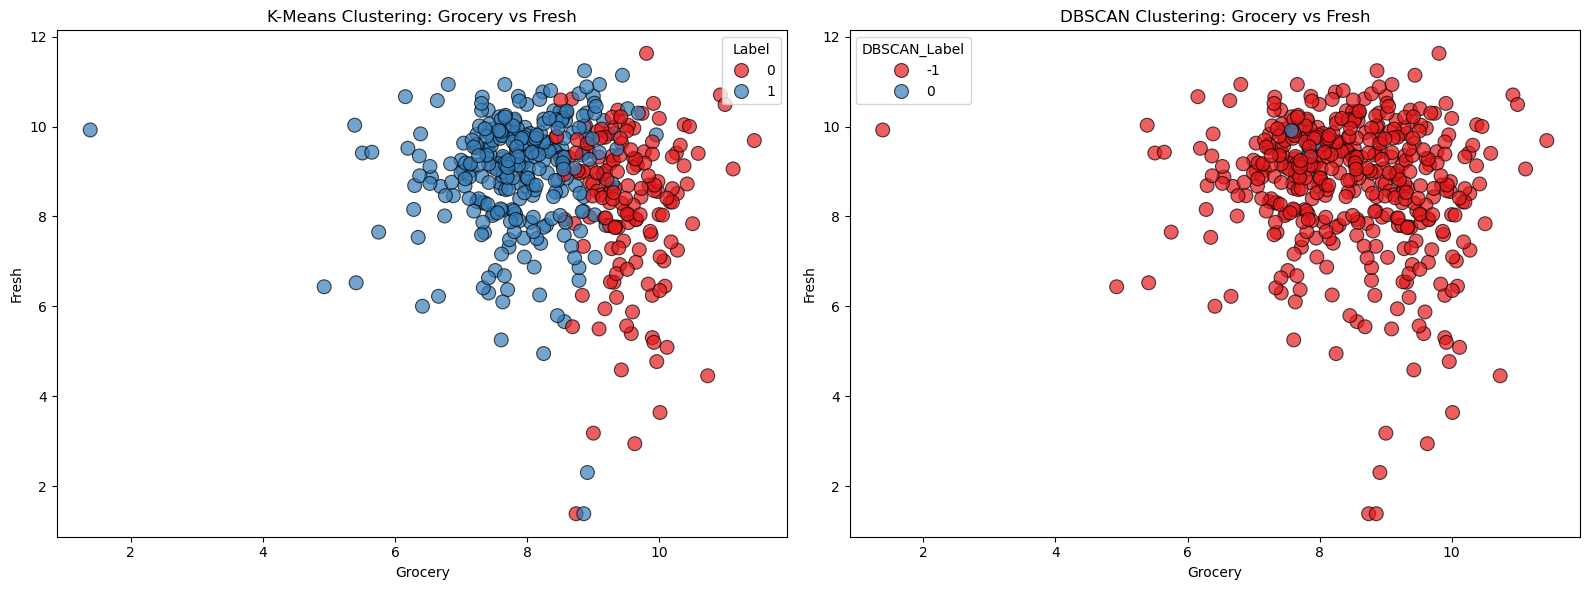

In [77]:
# Visualize Grocery vs Fresh using labels and labels_DBSCAN
plot_comparison(
    x=cleaned_data['Grocery'], 
    y=cleaned_data['Fresh'], 
    labels_kmeans=cleaned_data['Label'], 
    labels_dbscan=cleaned_data['DBSCAN_Label'],
    x_label='Grocery', 
    y_label='Fresh', 
    title_kmeans='K-Means Clustering: Grocery vs Fresh', 
    title_dbscan='DBSCAN Clustering: Grocery vs Fresh'
)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

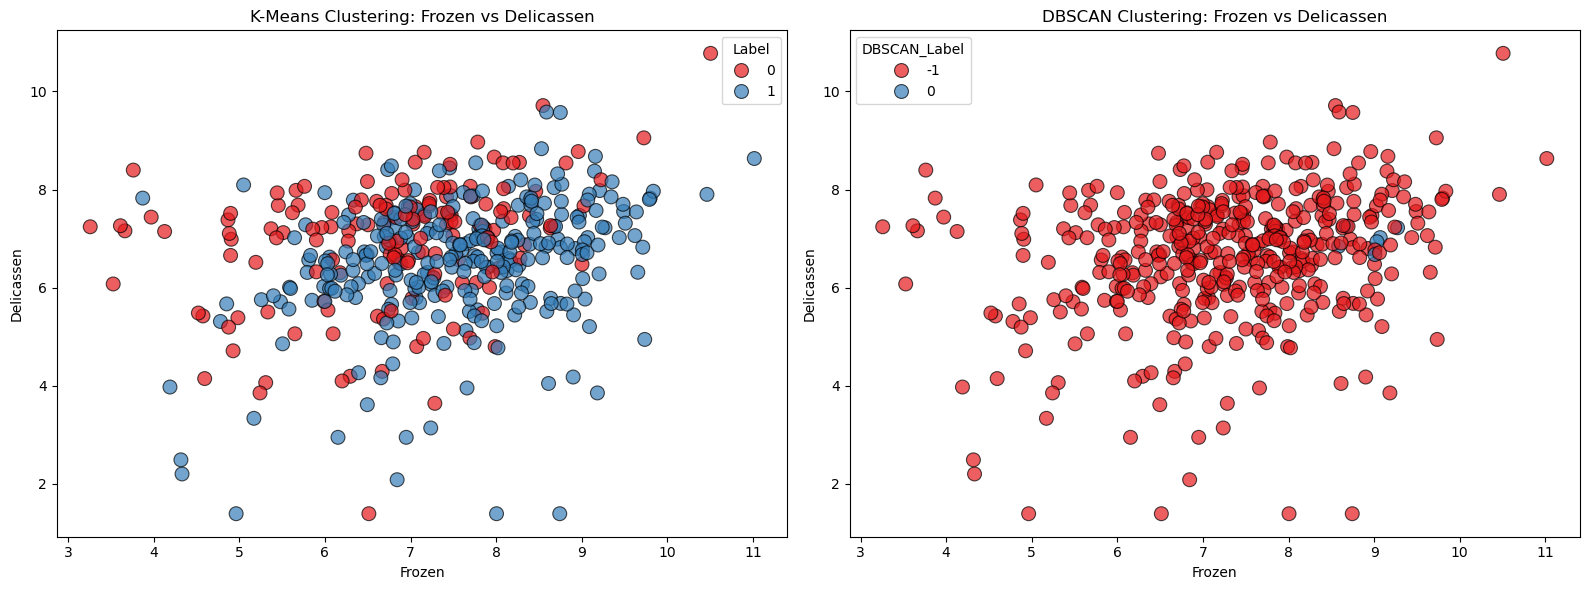

In [78]:
# Visualize Frozen vs Delicassen using labels and labels_DBSCAN
plot_comparison(
    x=cleaned_data['Frozen'], 
    y=cleaned_data['Delicassen'], 
    labels_kmeans=cleaned_data['Label'], 
    labels_dbscan=cleaned_data['DBSCAN_Label'],
    x_label='Frozen', 
    y_label='Delicassen', 
    title_kmeans='K-Means Clustering: Frozen vs Delicassen', 
    title_dbscan='DBSCAN Clustering: Frozen vs Delicassen'
)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [79]:
# Group by K-Means labels and compute the mean for each cluster
kmeans_group_means = cleaned_data.groupby('Label').mean()
print("K-Means Group Means:")
print(kmeans_group_means)

# Group by DBSCAN labels and compute the mean for each cluster
dbscan_group_means = cleaned_data.groupby('DBSCAN_Label').mean()
print("\nDBSCAN Group Means:")
print(dbscan_group_means)


K-Means Group Means:
        Channel    Region     Fresh      Milk   Grocery    Frozen  Delicassen  \
Label                                                                           
0      1.891720  2.592357  8.306004  9.057296  9.512151  6.807064    6.952644   
1      1.007067  2.515901  8.969595  7.602527  7.848631  7.578329    6.514899   

       DBSCAN_Label  
Label                
0         -1.000000  
1         -0.978799  

DBSCAN Group Means:
               Channel    Region     Fresh      Milk   Grocery    Frozen  \
DBSCAN_Label                                                               
-1            1.327189  2.536866  8.719908  8.127831  8.450541  7.280498   
 0            1.000000  3.000000  9.666331  7.672007  7.839252  8.940008   

              Delicassen     Label  
DBSCAN_Label                        
-1              6.666689  0.638249  
 0              6.989738  1.000000  


Which algorithm appears to perform better?

**Your observations here**

- None of then really make so much sense to be honest. Maybe K-means looks better in this case, but the data seems more like a 1 cluster thing rather than different clusters when looked at it visually

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [80]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data after transformation from Challenge 2
customers_scale = scaler.fit_transform(wholesale_data)

# The scaled data is now ready for k-means clustering
print(customers_scale[:5])  # Display the first 5 rows of the scaled data



[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


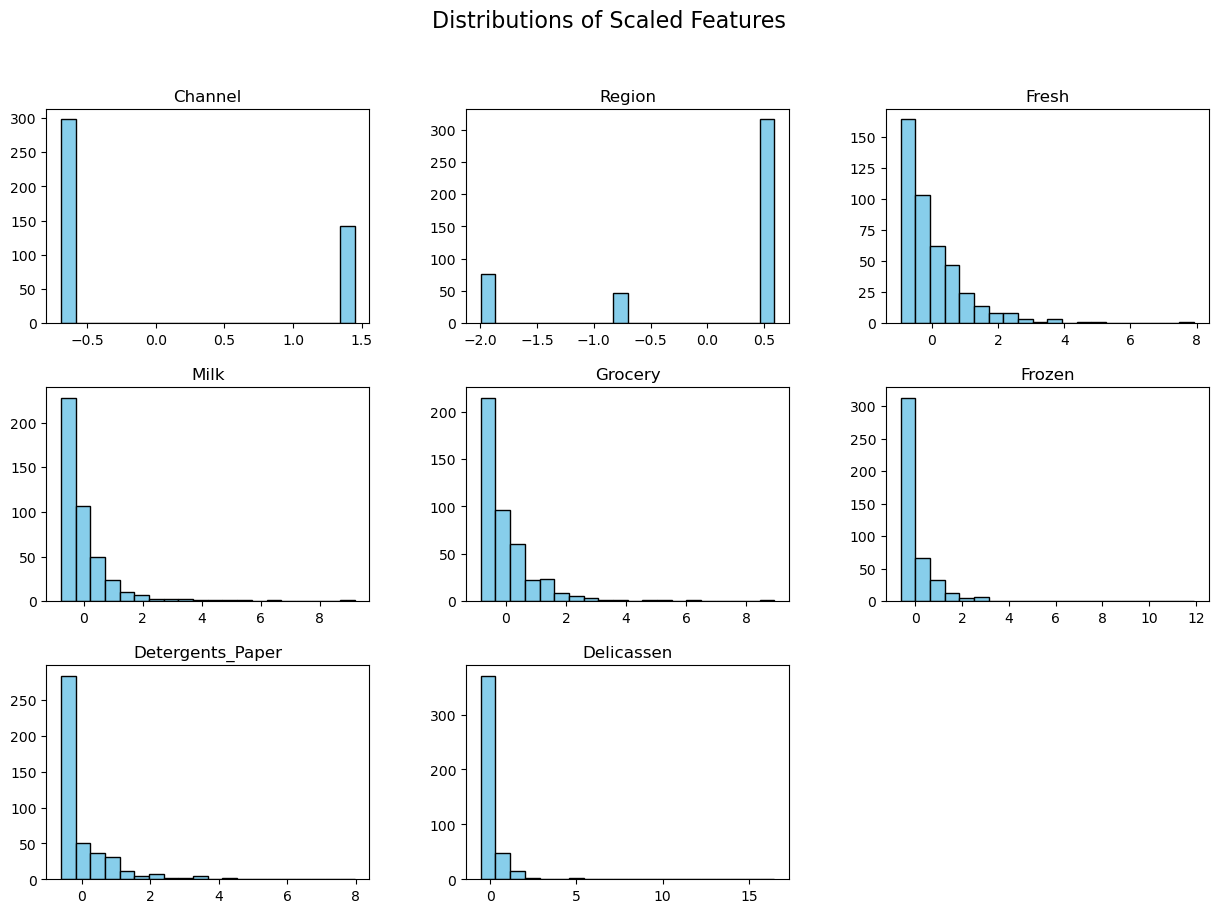

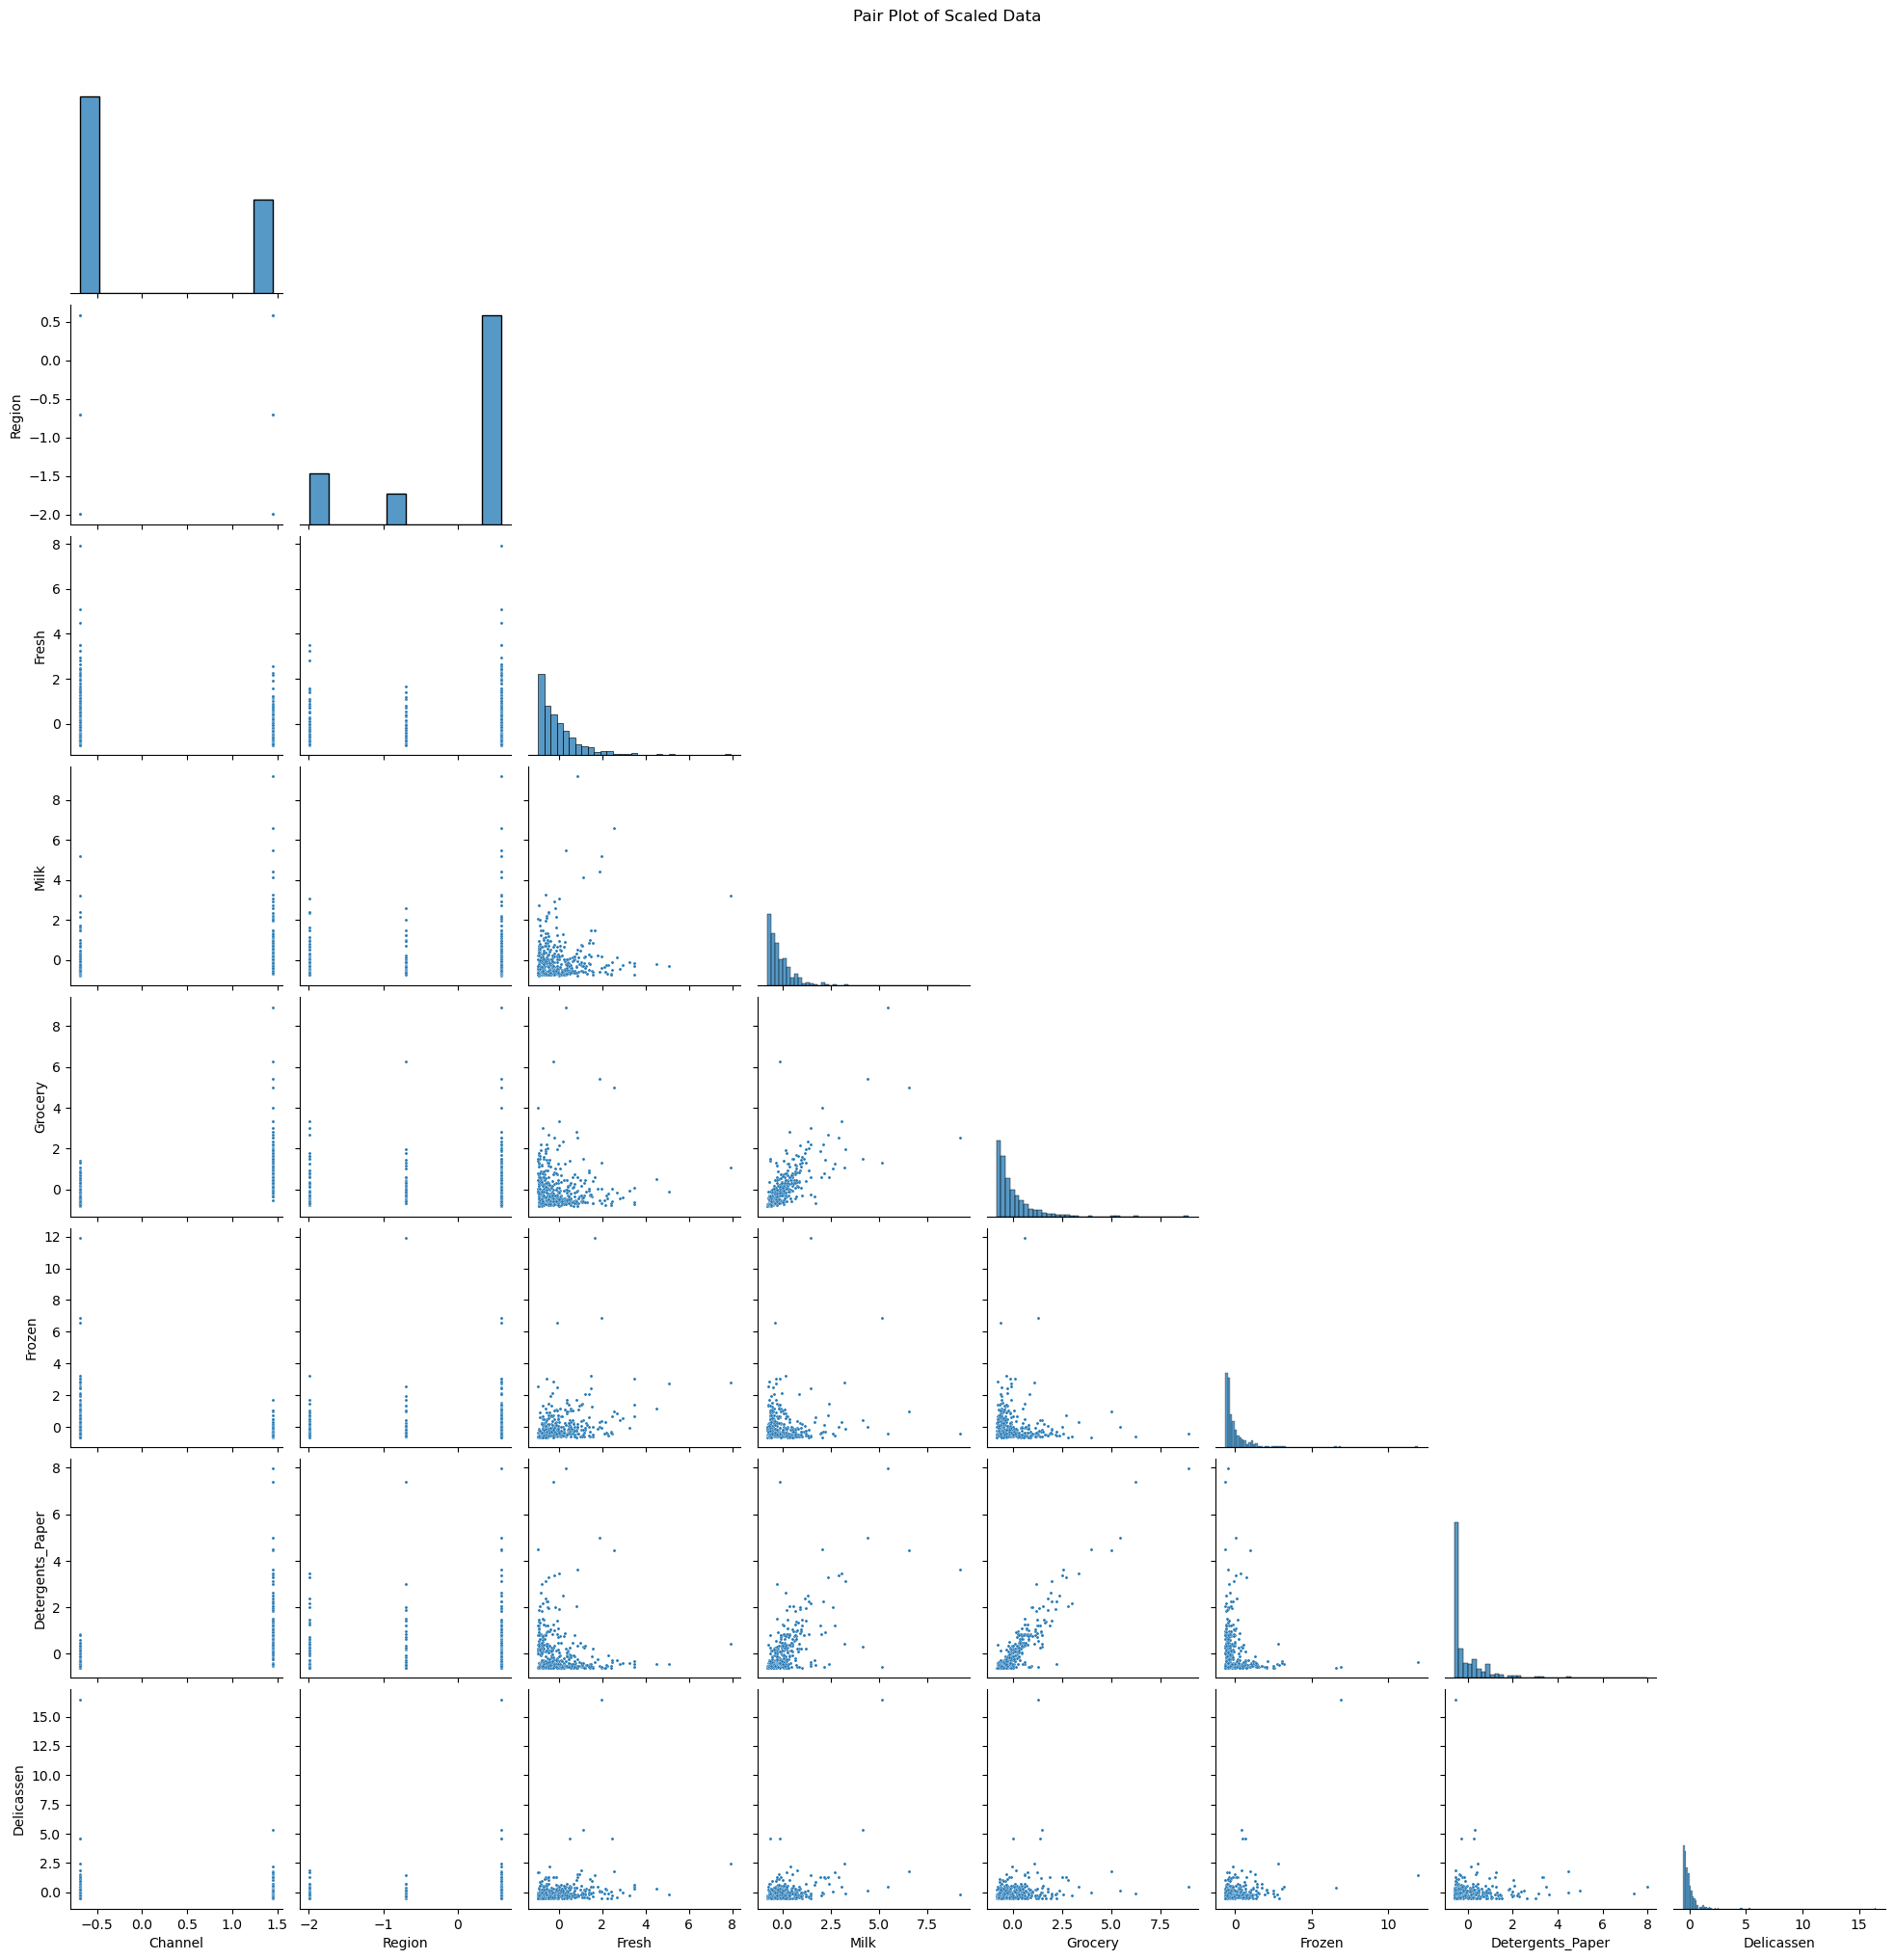

In [82]:
# Create a DataFrame from the scaled data for easier visualization
scaled_df = pd.DataFrame(customers_scale, columns=wholesale_data.columns)

# Plot histograms to check distributions of scaled data
scaled_df.hist(bins=20, figsize=(15, 10), grid=False, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Scaled Features", fontsize=16)
plt.show()
# Plot pairwise relationships to visually inspect the scaled data spread
sns.pairplot(scaled_df, corner=True, plot_kws={"s": 5})
plt.suptitle("Pair Plot of Scaled Data", y=1.02)
plt.show()

In [83]:
# Step 2: Define the number of clusters based on the elbow method (in this case, 2)
# Fit the K-Means model to the scaled data
kmeans_2 = KMeans(n_clusters=5, random_state=42)  # Adding random_state for reproducibility
kmeans_2.fit(customers_scale)

# Step 3: Predict the clusters for the scaled data
labels = kmeans_2.predict(customers_scale)

# Alternatively, you can directly use the labels_ attribute after fitting
clusters = kmeans_2.labels_.tolist()

# Step 4: Assign the cluster labels to the cleaned DataFrame
wholesale_data['Label'] = clusters

# Display the first few rows of the DataFrame with assigned labels
print(cleaned_data.head())

# Optional: Print the cluster centers and inertia
print("\nCluster Centers:\n", kmeans_2.cluster_centers_)
print("\nInertia:", kmeans_2.inertia_)
pd.Series(labels).value_counts()

c:\Users\Salva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Channel  Region      Fresh      Milk   Grocery    Frozen  Delicassen  \
0        2       3   9.446992  9.175438  8.930891  5.370638    7.199678   
1        2       3   8.861917  9.191259  9.166284  7.474772    7.482682   
2        2       3   8.756840  9.083529  8.947026  7.785721    8.967632   
3        1       3   9.492960  7.087574  8.348064  8.764834    7.489412   
4        2       3  10.026413  8.596189  8.881697  8.272826    8.553718   

   Label  DBSCAN_Label  
0      0            -1  
1      0            -1  
2      0            -1  
3      1            -1  
4      0            -1  

Cluster Centers:
 [[ 1.44865163e+00  1.69928497e-01 -3.06362835e-01  4.17500207e-01
   6.51879518e-01 -3.57269701e-01  6.76847966e-01  6.33174701e-03]
 [-6.90297086e-01  5.90668285e-01 -4.67133435e-03 -3.71093495e-01
  -4.69150283e-01 -2.49841169e-02 -4.46369120e-01 -1.50404891e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+0

1    200
0    126
3     90
4     14
2     10
Name: count, dtype: int64

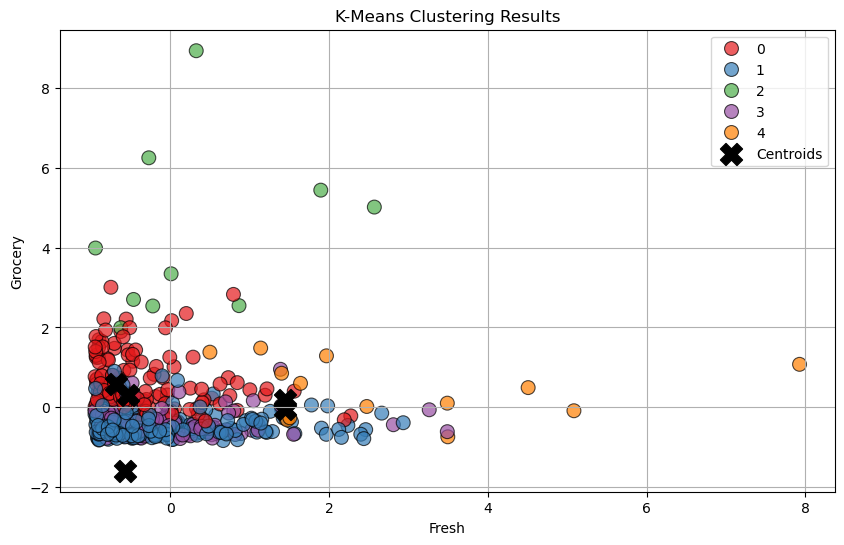

In [84]:
# Assuming `customers_scale` is the scaled data and `cleaned_data` is the DataFrame with original values
# Add the cluster labels to the scaled DataFrame for plotting
scaled_df = pd.DataFrame(customers_scale, columns=wholesale_data.columns[:-1])  # Excluding 'Label' column
scaled_df['Label'] = labels  # Add labels column to scaled data

# Plotting the first two principal components or any two features (e.g., 'Fresh' vs. 'Grocery')
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_df['Fresh'], 
    y=scaled_df['Grocery'], 
    hue=scaled_df['Label'], 
    palette='Set1', 
    s=100, 
    alpha=0.7, 
    edgecolor='k'
)
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], c='black', s=250, marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.legend()
plt.grid(True)
plt.show()




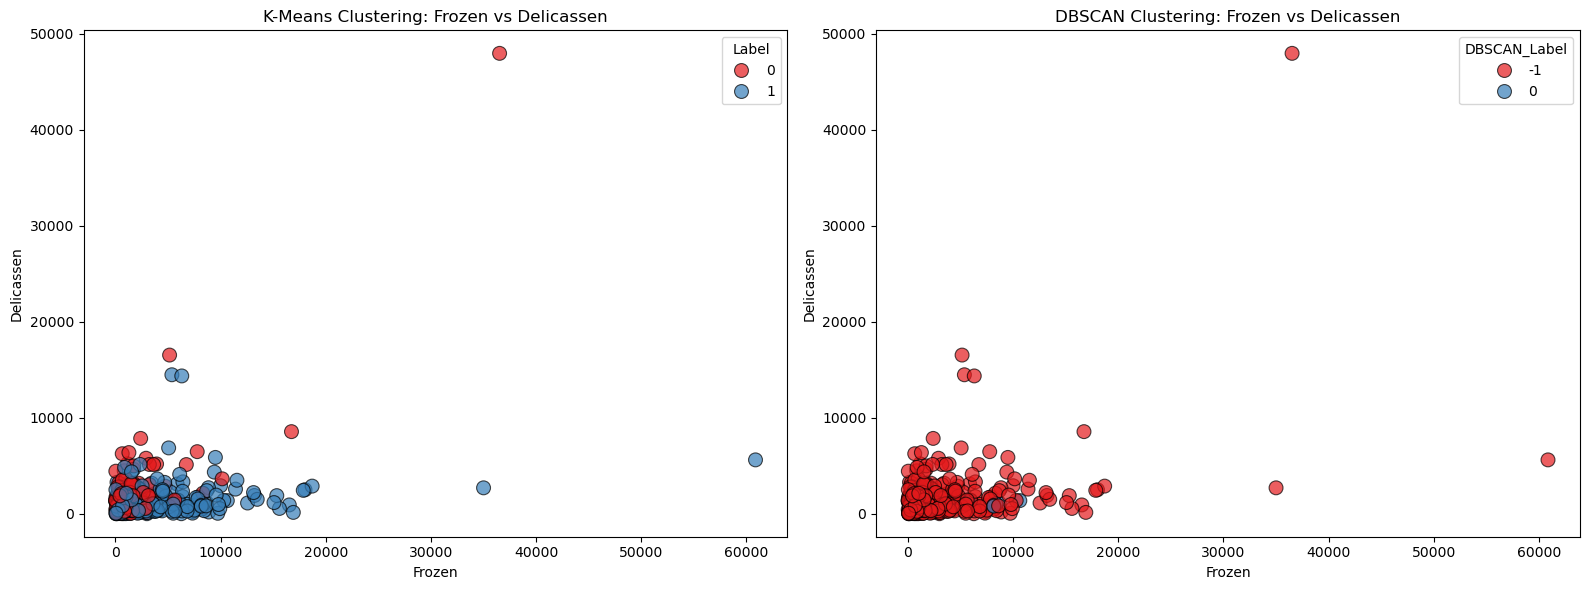

In [88]:
# Visualize Frozen vs Delicassen using labels and labels_DBSCAN
plot_comparison(
    x=wholesale_data['Frozen'], 
    y=wholesale_data['Delicassen'], 
    labels_kmeans=cleaned_data['Label'], 
    labels_dbscan=cleaned_data['DBSCAN_Label'],
    x_label='Frozen', 
    y_label='Delicassen', 
    title_kmeans='K-Means Clustering: Frozen vs Delicassen', 
    title_dbscan='DBSCAN Clustering: Frozen vs Delicassen'
)

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

**Your comment here**

- 